In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
def check_data(df):
    print("*"*10,"Missing Values","*"*10)
    print(df.isna().sum())
    print("*"*10,"İNFO","*"*10)
    print(df.info())
    print("*"*10,"SHAPE","*"*10)
    print(df.shape)
    print("*"*10,"DESCRİBE","*"*10)
    print(df.describe())
check_data(df)

********** Missing Values **********
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
********** İNFO **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProdu

In [4]:
df["churn"] = df["Exited"]
df.drop(["RowNumber","CustomerId","Surname","Exited"],axis = 1,inplace = True)

0    7963
1    2037
Name: churn, dtype: int64

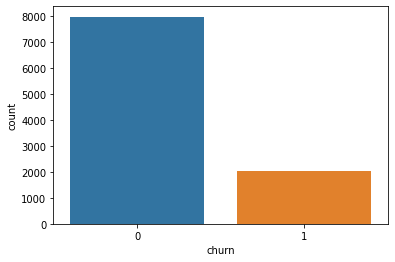

In [5]:
# The number of non-churn is nearly 4 times that of churn. We have an imbalanced data

sns.countplot(data=df, x="churn");
df["churn"].value_counts()

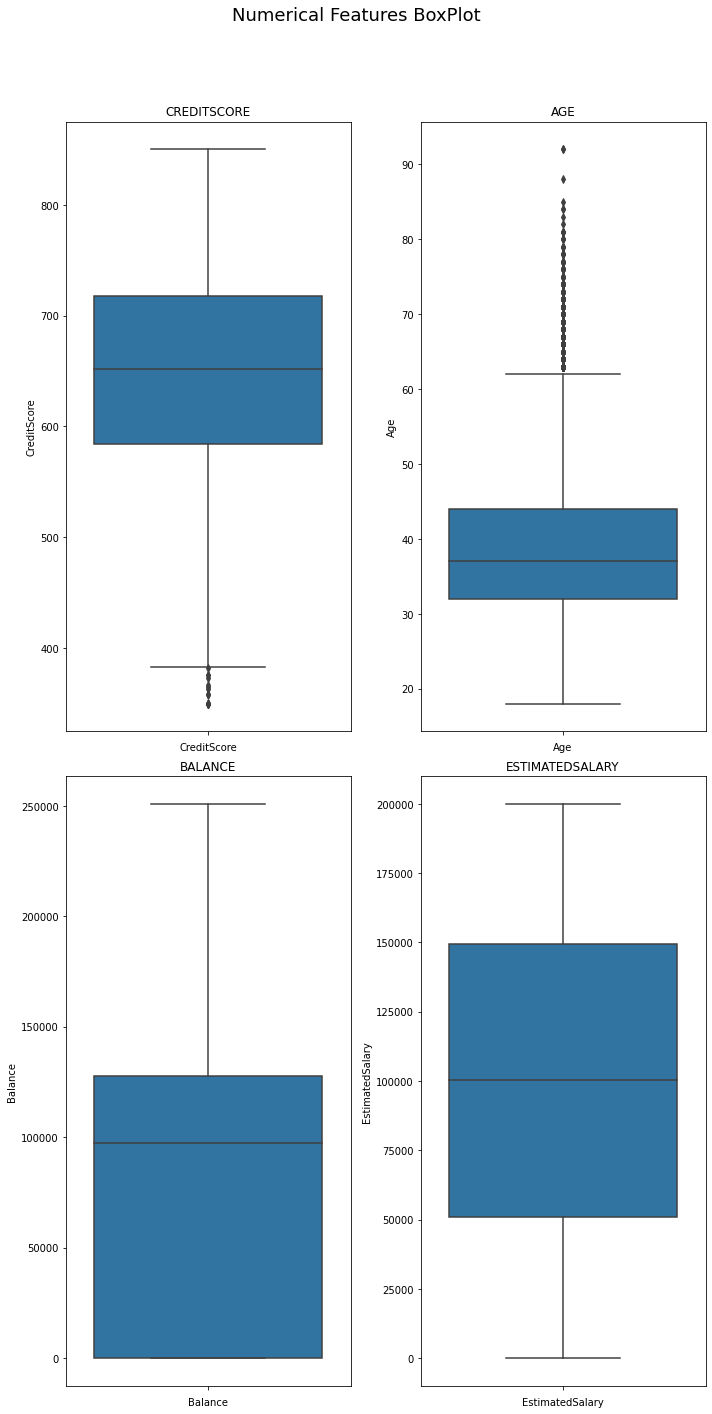

In [6]:
# Age and CreditScore features have outliers

num_feat = ['CreditScore','Age','Balance','EstimatedSalary']

plt.figure(figsize=(10,20))
for i,col in enumerate(num_feat):
    plt.subplot(2,2,i+1)
    sns.boxplot(y = df[col])
    plt.suptitle("Numerical Features BoxPlot",size = 18)
    plt.xlabel(f"{col}")
    plt.title(f"{col.upper()}")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9) 

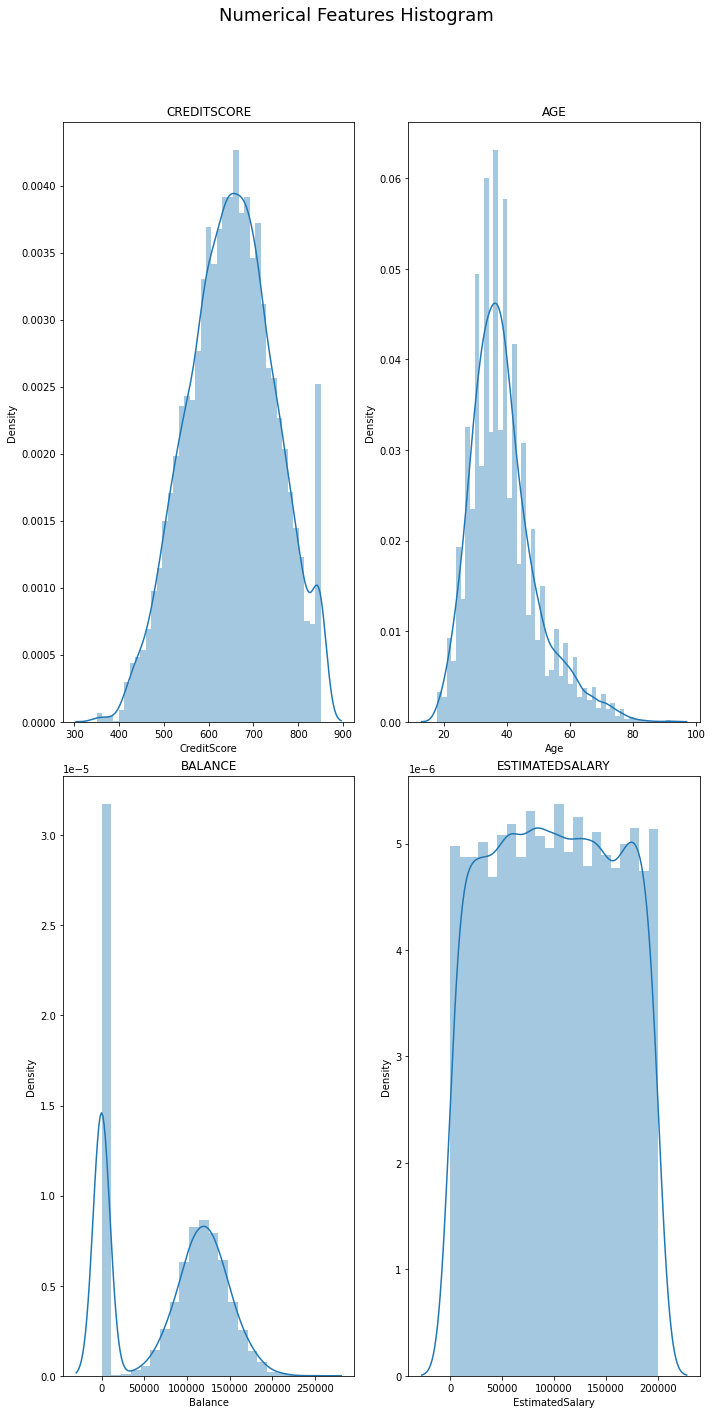

In [7]:
num_feat = ['CreditScore','Age','Balance','EstimatedSalary']

plt.figure(figsize=(10,20))
for i,col in enumerate(num_feat):
    plt.subplot(2,2,i+1)
    sns.distplot(x = df[col])
    plt.suptitle("Numerical Features Histogram",size = 18)
    plt.xlabel(f"{col}")
    plt.title(f"{col.upper()}")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9) 

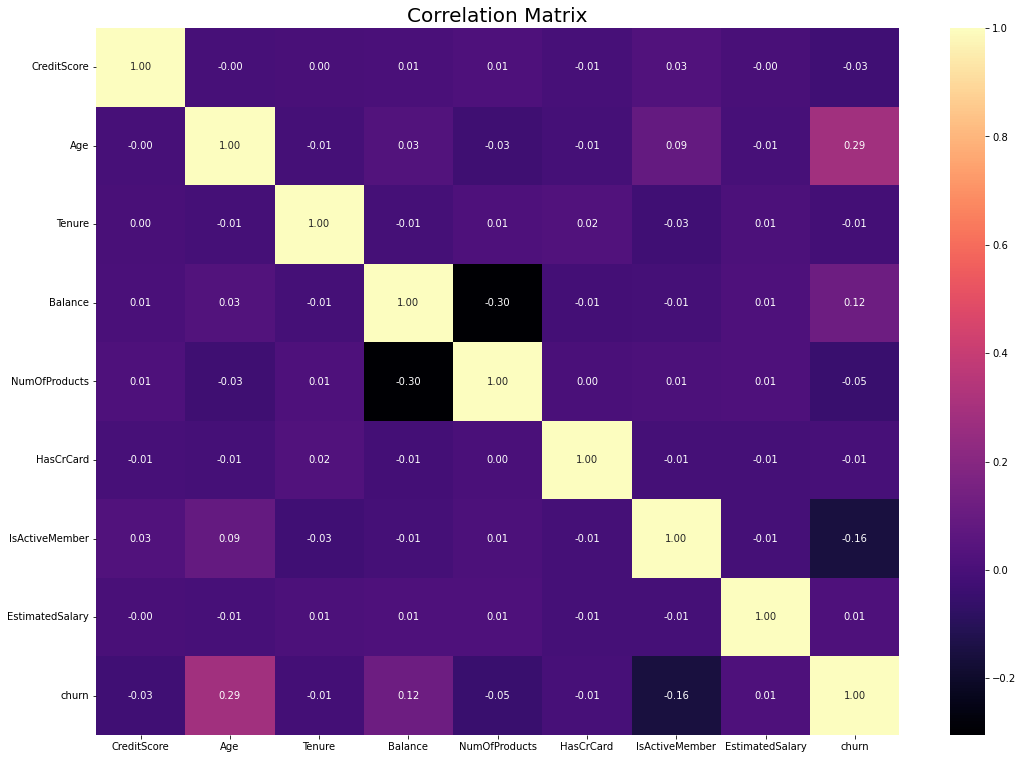

In [8]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [9]:
df.corrwith(df["churn"]).sort_values(ascending=False)

churn              1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
dtype: float64

# Outlier Handling

In [10]:
def outlier_handle(dataframe):
    """
    We can use the IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3.
    Any values that fall outside of this fence are considered outliers.
    To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3.
    This gives us the minimum and maximum fence posts that we compare each observation to.
    Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
    
    If lower than low_limit or greater than max_limit these are outliers

    """
    
    Q1 = df.quantile(0.1)
    Q3 = df.quantile(0.9)
    IQR = Q3-Q1
    
    low_limit = Q1 - IQR*1.5
    max_limit = Q3 + IQR*1.5
    
    print("Before: ",dataframe.shape)
    dataframe = dataframe[~((dataframe < (low_limit)) | (dataframe > (max_limit))).any(axis=1)]
    print("Before: ",dataframe.shape)
    
    return dataframe

df = outlier_handle(df)

Before:  (10000, 11)
Before:  (9940, 11)


# Churn Rate

### Even though certain groups have a high churn rate, the number of individuals in those groups is significantly low. For example, the "NumOfProducts" group with a value of "1" is nearly 7 times larger than the group with a value of "3," yet it has a lower churn rate. It is beneficial to consider these factors when making decisions. We can see these groups more easily by visualizing them.


In [11]:
from IPython.display import display

cat_feat = ["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]

global_churn = df["churn"].mean()

for c in cat_feat:
    df_group = df.groupby(c).churn.agg(["mean","count"])
    df_group["diff"] = global_churn - df_group["mean"]  # diff <0 More likely to churn // diff >0 Less likely to churn
    df_group["risk"] = df_group["mean"] / global_churn # risk >1 More likely to churn // risk <1 Less likely to churn
    display(df_group)

,mean,count,diff,risk
Geography,,,,
France,0.156670,4985,0.042223,0.787709
Germany,0.317907,2485,-0.119014,1.598381
Spain,0.164372,2470,0.034521,0.826435


,mean,count,diff,risk
Gender,,,,
Female,0.244395,4505,-0.045502,1.228775
Male,0.161178,5435,0.037716,0.810372


,mean,count,diff,risk
NumOfProducts,,,,
1,0.277144,5084,-0.078251,1.393430
2,0.075817,4590,0.123076,0.381194
3,0.827068,266,-0.628174,4.158347


,mean,count,diff,risk
HasCrCard,,,,
0,0.203008,2926,-0.004114,1.020685
1,0.197177,7014,0.001716,0.991371


,mean,count,diff,risk
IsActiveMember,,,,
0,0.263802,4818,-0.064909,1.326351
1,0.137837,5122,0.061057,0.693019


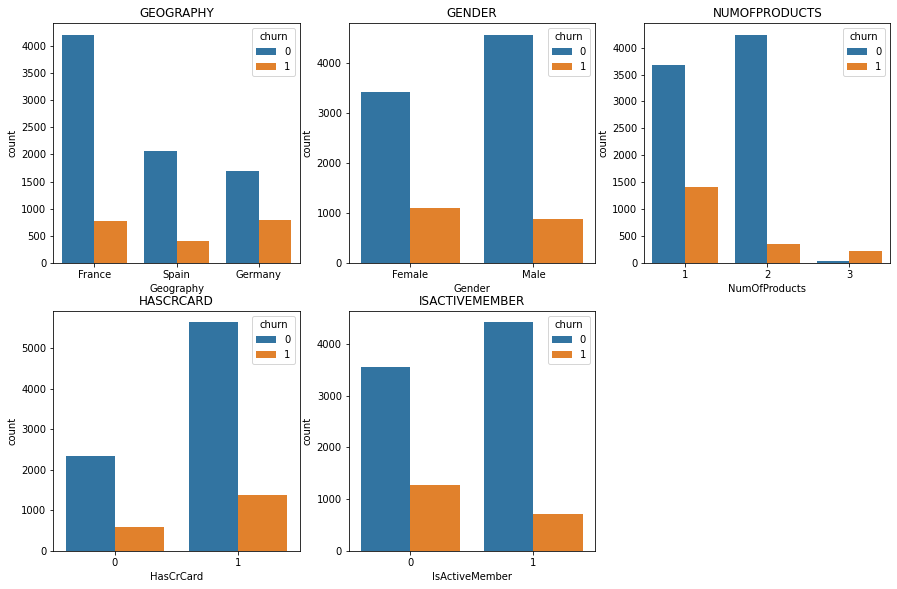

In [12]:
cat_feat = ["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]

plt.figure(figsize=(15,15))
for i,col in enumerate(cat_feat):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x = col,hue="churn")
    plt.xlabel(f"{col}")
    plt.title(f"{col.upper()}")

In [13]:
print("Tenure 0: ",len(df[(df.Tenure == 0)]))
print("Tenure 0 and Churn: ",len(df[(df.Tenure == 0) & (df.churn == 1)]))
print("Tenure 0 Churn Ratio: ",len(df[(df.Tenure == 0) & (df.churn == 1)]) / len(df[(df.Tenure == 0)]))

print("Tenure Lower 2: ",df[df.Tenure <= 2].churn.mean())
print("Tenure Greater 2: ",df[df.Tenure > 2].churn.mean())

Tenure 0:  413
Tenure 0 and Churn:  95
Tenure 0 Churn Ratio:  0.23002421307506055
Tenure Lower 2:  0.2067714631197098
Tenure Greater 2:  0.1962729588416678


In [14]:
# Encoding categorical features and scaling numeric featrues

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# LabelEncoder = Gender =[Female,Male] ==> Female =0, Male = 1
le = LabelEncoder()

le_col= ["Gender","Geography"]
for col in le_col:
    df[col] = le.fit_transform(df[col])

In [15]:
X = df.drop("churn",axis = 1)
y = df["churn"]

X_scaled = MinMaxScaler().fit_transform(X) # Xsc = (X−Xmin)/(Xmax−Xmin)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ROCAUC


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
models = [("Logistic Regression",LogisticRegression()),
         ("Random Forest",RandomForestClassifier()),
         ("Decision Tree Classifier",DecisionTreeClassifier()),
         ("XGB Classifier",XGBClassifier()),
         ("KNeighbors Classifier",KNeighborsClassifier())]

In [18]:
# X,y,models
def built(X,y,models):
    
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = 45,stratify = y)
    for name,model in models:
        model_fit = model.fit(X_train,y_train)
        model_pred = model_fit.predict(X_test)
        train_pred = model_fit.predict(X_train)
        
        
        plt.figure(figsize=(8,8))
        sns.heatmap(confusion_matrix(y_test,model_pred),annot = True,fmt ="g")
        plt.title(f"{name.upper()} Prediction")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        
        
        plt.figure(figsize=(8,8))
        sns.heatmap(confusion_matrix(y_train,train_pred),annot = True,fmt ="g")
        plt.title(f"{name.upper()} Train Prediction")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()
        print(f"{name.upper()} Prediction","\n",classification_report(y_test,model_pred))
        print(f"{name.upper()} Train Prediction","\n",classification_report(y_train,train_pred))
        
        
        viz = ROCAUC(model,
                     classes=model_fit.classes_,
                     per_class=True,
                     cmap="Set1")
        viz.fit(X_train,y_train)
        viz.score(X_test, y_test)
        viz.show();
        print("*"*100)

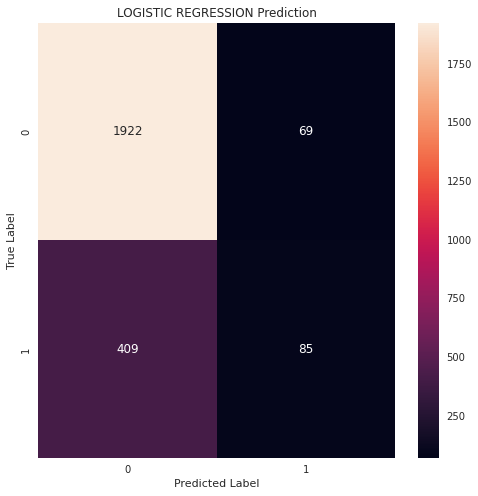

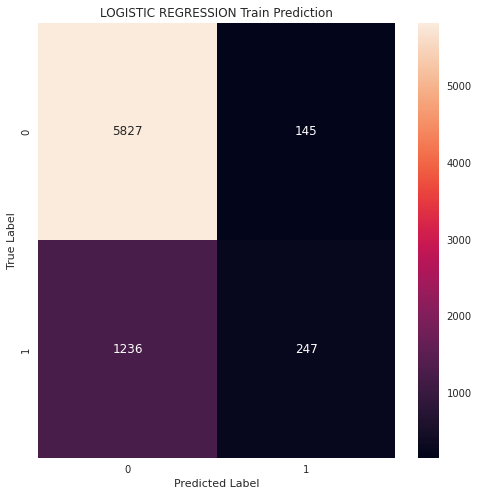

LOGISTIC REGRESSION Prediction 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1991
           1       0.55      0.17      0.26       494

    accuracy                           0.81      2485
   macro avg       0.69      0.57      0.58      2485
weighted avg       0.77      0.81      0.76      2485

LOGISTIC REGRESSION Train Prediction 
               precision    recall  f1-score   support

           0       0.83      0.98      0.89      5972
           1       0.63      0.17      0.26      1483

    accuracy                           0.81      7455
   macro avg       0.73      0.57      0.58      7455
weighted avg       0.79      0.81      0.77      7455



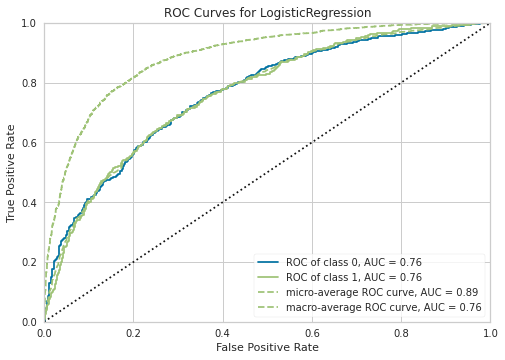

****************************************************************************************************


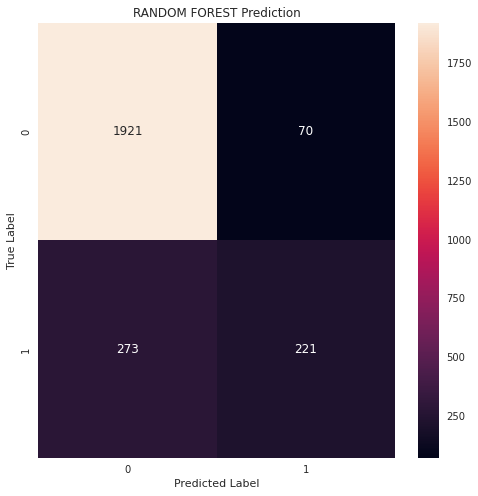

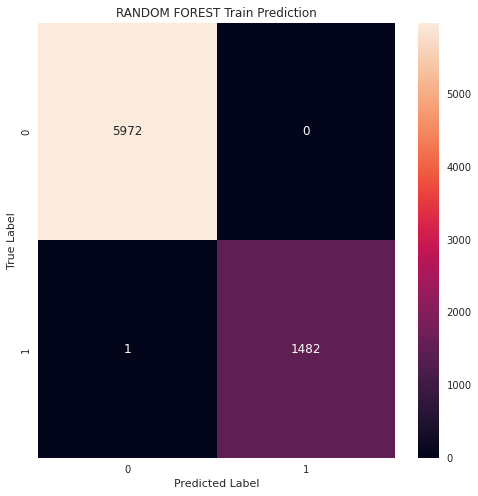

RANDOM FOREST Prediction 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.76      0.45      0.56       494

    accuracy                           0.86      2485
   macro avg       0.82      0.71      0.74      2485
weighted avg       0.85      0.86      0.85      2485

RANDOM FOREST Train Prediction 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      1483

    accuracy                           1.00      7455
   macro avg       1.00      1.00      1.00      7455
weighted avg       1.00      1.00      1.00      7455



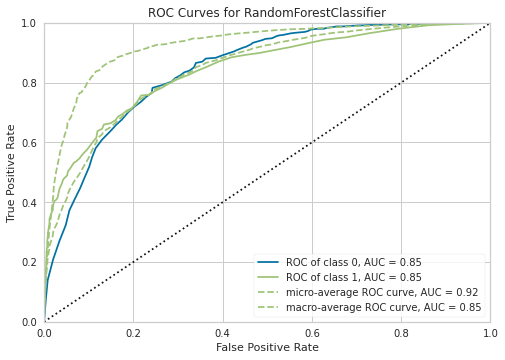

****************************************************************************************************


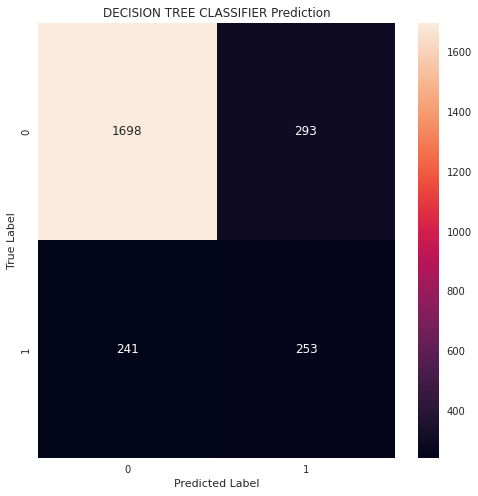

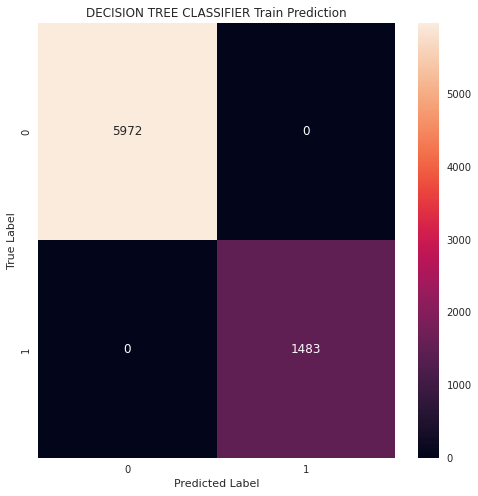

DECISION TREE CLASSIFIER Prediction 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1991
           1       0.46      0.51      0.49       494

    accuracy                           0.79      2485
   macro avg       0.67      0.68      0.68      2485
weighted avg       0.79      0.79      0.79      2485

DECISION TREE CLASSIFIER Train Prediction 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      1483

    accuracy                           1.00      7455
   macro avg       1.00      1.00      1.00      7455
weighted avg       1.00      1.00      1.00      7455



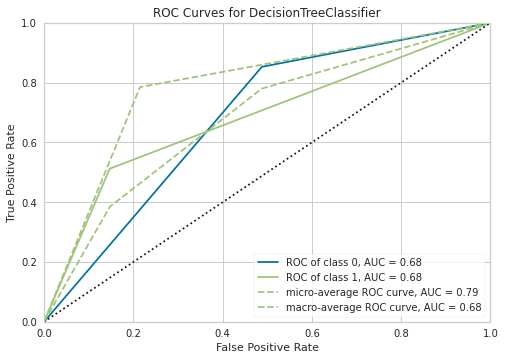

****************************************************************************************************


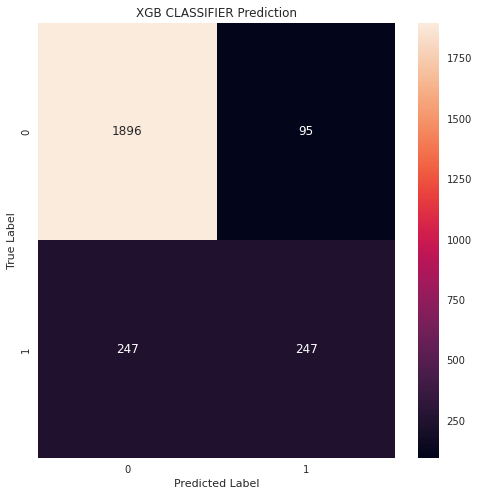

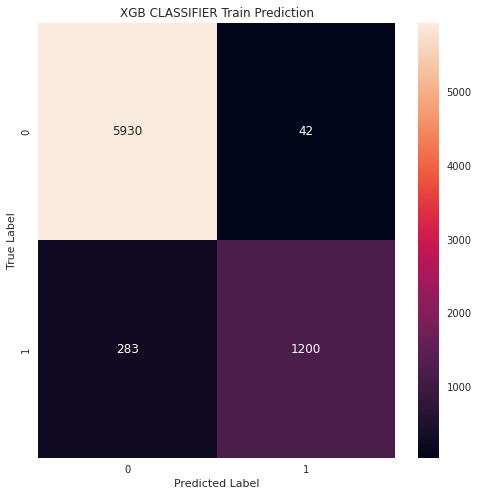

XGB CLASSIFIER Prediction 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1991
           1       0.72      0.50      0.59       494

    accuracy                           0.86      2485
   macro avg       0.80      0.73      0.75      2485
weighted avg       0.85      0.86      0.85      2485

XGB CLASSIFIER Train Prediction 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5972
           1       0.97      0.81      0.88      1483

    accuracy                           0.96      7455
   macro avg       0.96      0.90      0.93      7455
weighted avg       0.96      0.96      0.95      7455



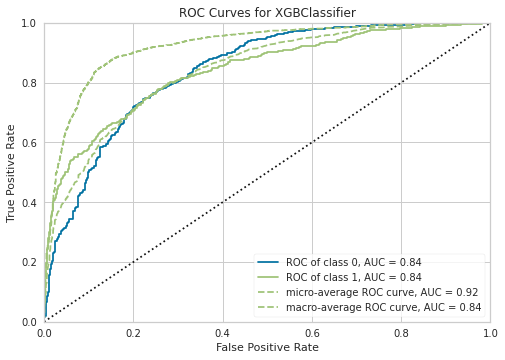

****************************************************************************************************


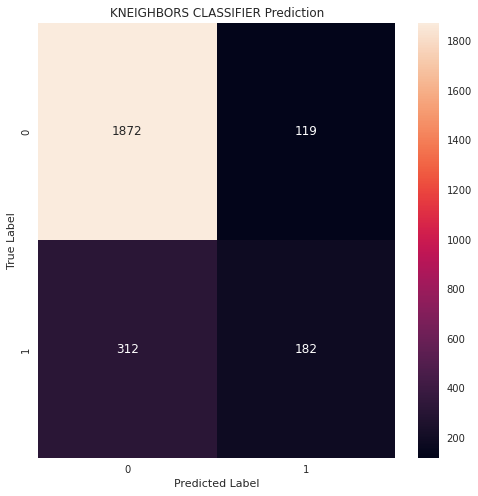

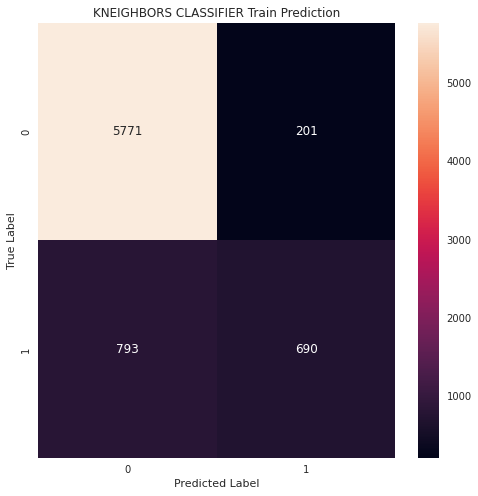

KNEIGHBORS CLASSIFIER Prediction 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1991
           1       0.60      0.37      0.46       494

    accuracy                           0.83      2485
   macro avg       0.73      0.65      0.68      2485
weighted avg       0.81      0.83      0.81      2485

KNEIGHBORS CLASSIFIER Train Prediction 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      5972
           1       0.77      0.47      0.58      1483

    accuracy                           0.87      7455
   macro avg       0.83      0.72      0.75      7455
weighted avg       0.86      0.87      0.85      7455



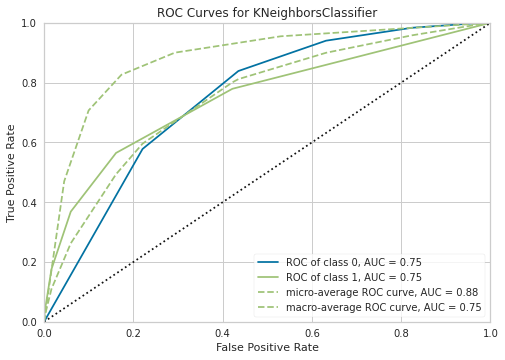

****************************************************************************************************


In [19]:
built(X_scaled,y,models)

# We have an Overfitting problem in tree-based algorithms. Let's try to handle with parameters tuning.

# Random Forest Tuning

In [20]:
# Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X_scaled,
                                                 y,
                                                 test_size = 0.25,
                                                 random_state = 45,
                                                 stratify = y)

In [21]:
rf_params = {"max_depth":[3,5,7,10],
            "max_features": [8,10,12,15,18],
            "n_estimators": [8,10,12,15,17]}

rf = RandomForestClassifier()
rf_model_cv = GridSearchCV(rf,rf_params,cv=5,n_jobs = -1)

rf_model_cv.fit(X_train,y_train)
rf_model_cv.best_params_

{'max_depth': 7, 'max_features': 8, 'n_estimators': 15}

In [22]:
rff = RandomForestClassifier(max_depth=7,
                                 max_features=8,
                                 n_estimators=17)

rf_tuned=rff.fit(X_train,y_train)

rf_pred= rf_tuned.predict(X_test)
rf_train_pred = rf_tuned.predict(X_train)

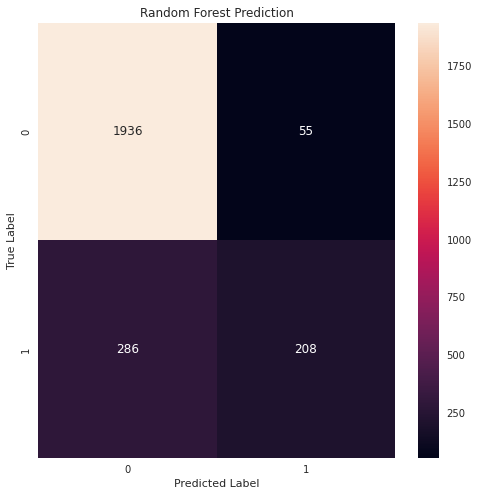

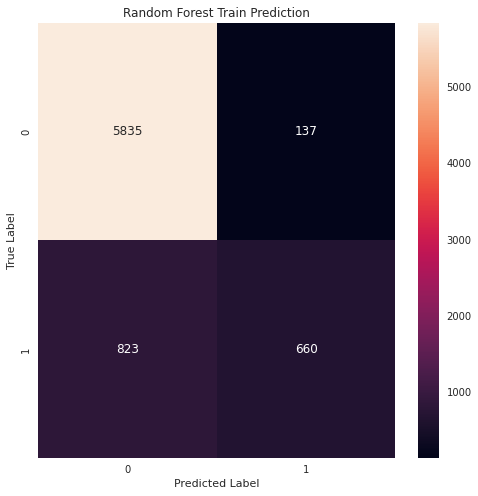

Random Forest Prediction 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1991
           1       0.79      0.42      0.55       494

    accuracy                           0.86      2485
   macro avg       0.83      0.70      0.73      2485
weighted avg       0.86      0.86      0.85      2485

Random Forest Train Prediction 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92      5972
           1       0.83      0.45      0.58      1483

    accuracy                           0.87      7455
   macro avg       0.85      0.71      0.75      7455
weighted avg       0.87      0.87      0.86      7455



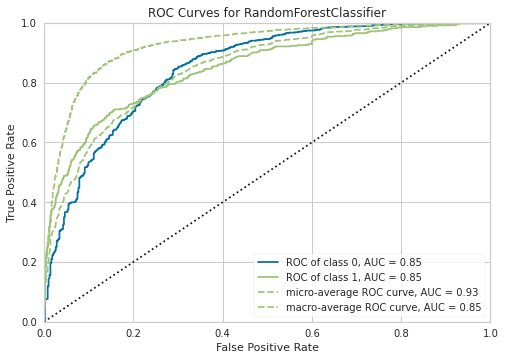

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot = True,fmt ="g")
plt.title("Random Forest Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
        
        
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_train,rf_train_pred),annot = True,fmt ="g")
plt.title("Random Forest Train Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Random Forest Prediction","\n",classification_report(y_test,rf_pred))
print("Random Forest Train Prediction","\n",classification_report(y_train,rf_train_pred))
        
        
viz = ROCAUC(rff,
            classes=rf_tuned.classes_,
            per_class=True,
            cmap="Set1")
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();

# Decision Tree Tuning

In [24]:
clf_params = {"max_depth": range(1,10),
             "min_samples_split": list(range(2,15)),
             "max_features": [8,10,12,15,18]}

dt = DecisionTreeClassifier()
dt_model_cv = GridSearchCV(dt,clf_params,cv=5,n_jobs = -1)

dt_model_cv.fit(X_train,y_train)
dt_model_cv.best_params_

{'max_depth': 5, 'max_features': 8, 'min_samples_split': 11}

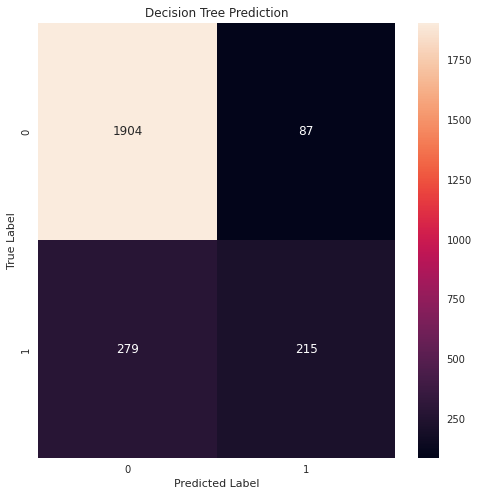

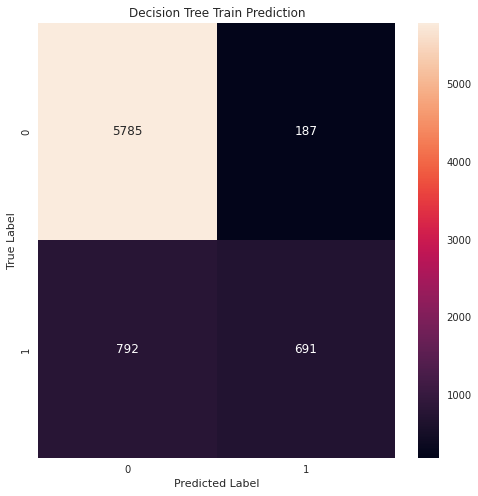

Decision Tree Prediction 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1991
           1       0.71      0.44      0.54       494

    accuracy                           0.85      2485
   macro avg       0.79      0.70      0.73      2485
weighted avg       0.84      0.85      0.84      2485

Decision Tree Train Prediction 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      5972
           1       0.79      0.47      0.59      1483

    accuracy                           0.87      7455
   macro avg       0.83      0.72      0.75      7455
weighted avg       0.86      0.87      0.86      7455



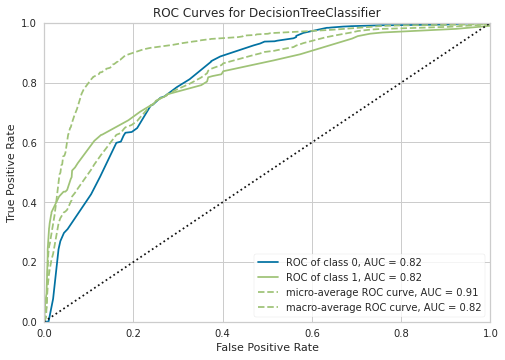

In [25]:
dtt = DecisionTreeClassifier(max_depth=7,
                           min_samples_split=11,
                           max_features=8)
dt_tuned = dtt.fit(X_train,y_train)
dt_pred= dt_tuned.predict(X_test)
dt_train_pred = dt_tuned.predict(X_train)


plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,dt_pred),annot = True,fmt ="g")
plt.title("Decision Tree Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
        
        
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_train,dt_train_pred),annot = True,fmt ="g")
plt.title("Decision Tree Train Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Decision Tree Prediction","\n",classification_report(y_test,dt_pred))
print("Decision Tree Train Prediction","\n",classification_report(y_train,dt_train_pred))
        
        
viz = ROCAUC(dtt,
            classes=dt_tuned.classes_,
            per_class=True,
            cmap="Set1")
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();

# XGBoost Tuning

[13:49:34] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




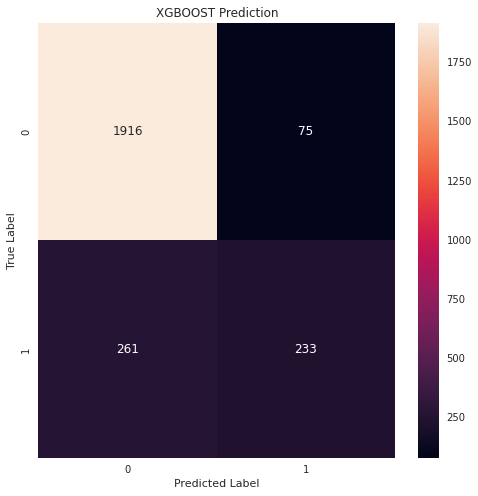

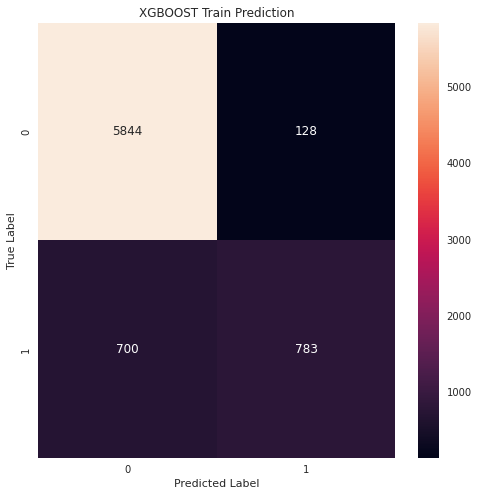

XGBOOST Prediction 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.76      0.47      0.58       494

    accuracy                           0.86      2485
   macro avg       0.82      0.72      0.75      2485
weighted avg       0.86      0.86      0.85      2485

XGBOOST Train Prediction 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      5972
           1       0.86      0.53      0.65      1483

    accuracy                           0.89      7455
   macro avg       0.88      0.75      0.79      7455
weighted avg       0.89      0.89      0.88      7455



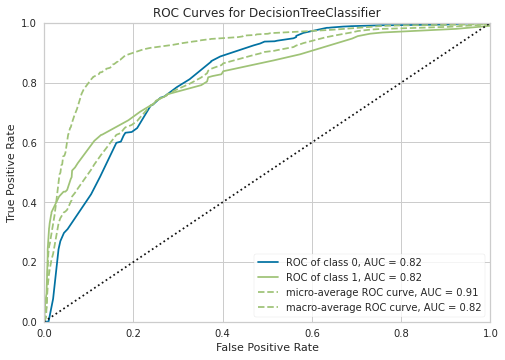

In [26]:
xgb = XGBClassifier(learning_rate = 0.1,
                   max_depth = 6,
                   min_samples_split = 2,
                   n_estimators = 50,
                   subsample = 0.8)

xgb_tuned = xgb.fit(X_train,y_train)
xgb_pred = xgb_tuned.predict(X_test)
xgb_train_pred = xgb_tuned.predict(X_train)


plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,xgb_pred),annot = True,fmt ="g")
plt.title("XGBOOST Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
        
        
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_train,xgb_train_pred),annot = True,fmt ="g")
plt.title("XGBOOST Train Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("XGBOOST Prediction","\n",classification_report(y_test,xgb_pred))
print("XGBOOST Train Prediction","\n",classification_report(y_train,xgb_train_pred))
        
        
viz = ROCAUC(dtt,
            classes=xgb_tuned.classes_,
            per_class=True,
            cmap="Set1")
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();

# Random Forest Features Importances

## We can choose only the most important features. So we can trade-off between accuracy and time

<AxesSubplot:>

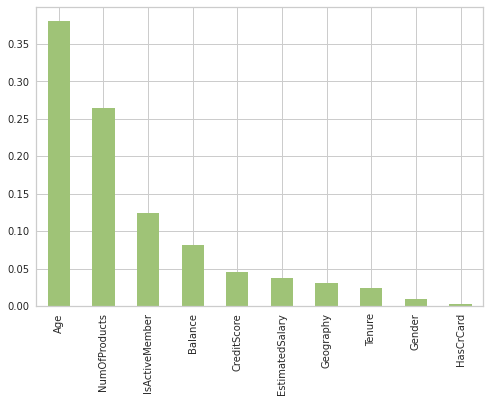

In [27]:
feature_imp = pd.Series(rf_tuned.feature_importances_, index= X.columns)
feature_imp.nlargest(10).plot(kind='bar',color="g")